## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

### Importing Library 

In [28]:
import requests ## HTTP library - lets us send http requests - to get text from the web
import nltk ## natural processing library - manipulate and analyze the text 
from bs4 import BeautifulSoup ## scape info from web page 
from collections import Counter ## dictionary subclass - keys are elements and count of elements/ word counts

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

### HTML code from Project Gutenburg 

In [10]:
# r is the responce variable 
r = requests.get("https://www.gutenberg.org/files/16/16-h/16-h.htm")
r.encoding = "utf-8"

print(r)
print(r.status_code)
print(r.url)

html = r.text
print(html[:2000])

<Response [200]>
200
https://www.gutenberg.org/files/16/16-h/16-h.htm
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>

<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no

### BeautifulSoup 
##### creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.


In [11]:
soup = BeautifulSoup(html)

text = soup.text

print(text[0:2000])






The Project Gutenberg eBook of Peter Pan, by James M. Barrie


body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify; }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}
h3 {font-size: 130%; margin-top: 1em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-break-before: always; margin-top: 4em;}

hr {width: 80%; margin-top: 2em; margin-bottom: 2em;}

p {text-indent: 1em;
   margin-top: 0.25em;
   margin-bottom: 0.25em; }

p.poem {text-indent: 0%;
        margin-left: 10%;
        font-size: 90%;
        margin-top: 1em;
        margin-bottom: 1em; }

p.letter {text-indent: 0%;
          margin-left

### Tokenization using NLTK

##### Convert text into tokens of words or characters 

In [15]:
tokenizer = nltk.tokenize.RegexpTokenizer("\w+") # w - identifies words or digits +- counts 

tokens = tokenizer.tokenize(text)

print(tokens[:6])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter']


##### Lower case everything for easier processing 

In [18]:
words = [token.lower() for token in tokens]

print(words[:6])

['the', 'project', 'gutenberg', 'ebook', 'of', 'peter']


##### Remove Stop words 

In [27]:
#nltk.download('stopwords')

In [21]:
stop_words = nltk.corpus.stopwords.words("english")

print(stop_words[:30])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [22]:
words_clean = [word for word in words if word not in stop_words]

print(words_clean[:6])

['project', 'gutenberg', 'ebook', 'peter', 'pan', 'james']


In [25]:
count = Counter(words_clean)

top_10 = count.most_common(10)

print(top_10)

[('peter', 409), ('wendy', 362), ('said', 358), ('would', 217), ('one', 212), ('hook', 174), ('could', 142), ('cried', 136), ('john', 133), ('time', 126)]


##### List of Protagonists 

In [26]:
protagonists = ["peter","wendy","hook","john"]

Text(0.5, 1.0, 'Peter Pan - Most common words')

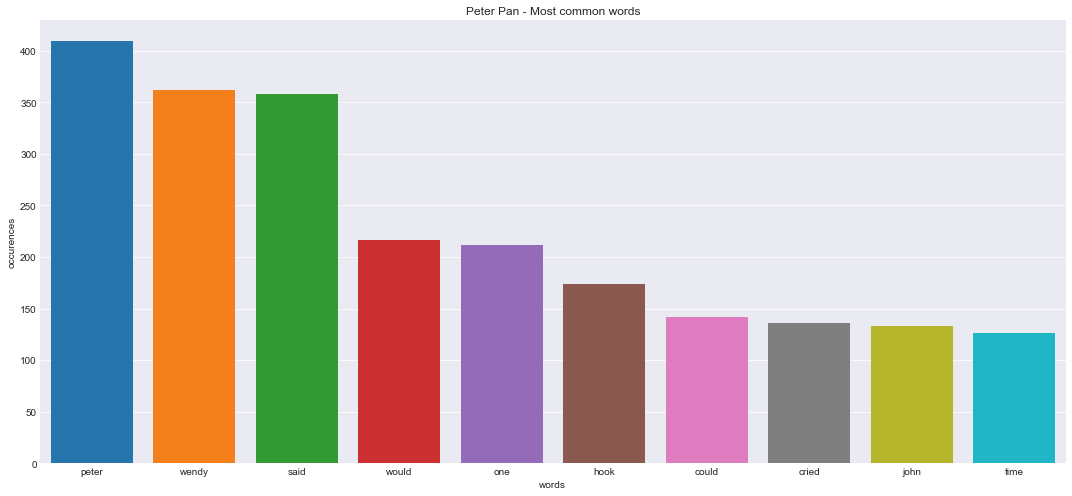

In [31]:
df = pd.DataFrame(top_10, columns=["words","occurences"])

sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.barplot(x="words",y="occurences",data=df, saturation=0.9).set_title("Peter Pan - Most common words")